 # <font color='darkblue'><center><u>NEWS</u> <u>CLASSIFICATION</u> <u>AND</u> <u>RECOMMENDATION</u><br><u>USING</u> <u>NLP</u> <u>AND</u> <u>MACHINE</u> <u>LEARNING</u></center></font>

## *Importing Necessary Library*

In [1]:
#Numbers and table related
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#NLP
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

#Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## *Loading Train data*

In [2]:
#reading and displaying the dataset
dataset = pd.read_csv("BBC News Train.csv")
dataset

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
#shape of the data
dataset.shape

(1490, 3)

In [4]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


## *Dropping Unnecessary Columns*

In [5]:
#droping the column "ArticleId"
dataset.drop('ArticleId',axis=1,inplace=True)
dataset

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
1485,double eviction from big brother model caprice...,entertainment
1486,dj double act revamp chart show dj duo jk and ...,entertainment
1487,weak dollar hits reuters revenues at media gro...,business
1488,apple ipod family expands market apple has exp...,tech


## *Getting value counts of target columns*

In [6]:
#unique values from 'Category' column
dataset['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [7]:
#value counts of unique values in 'Category' column
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

## *Encoding target column*

In [8]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Category'.
dataset['Category']= label_encoder.fit_transform(dataset['Category'])
  
dataset['Category'].unique()

array([0, 4, 2, 3, 1])

In [9]:
dataset

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens in ...,0
3,lifestyle governs mobile choice faster bett...,4
4,enron bosses in $168m payout eighteen former e...,0
...,...,...
1485,double eviction from big brother model caprice...,1
1486,dj double act revamp chart show dj duo jk and ...,1
1487,weak dollar hits reuters revenues at media gro...,0
1488,apple ipod family expands market apple has exp...,4


## *Visualizing the data*

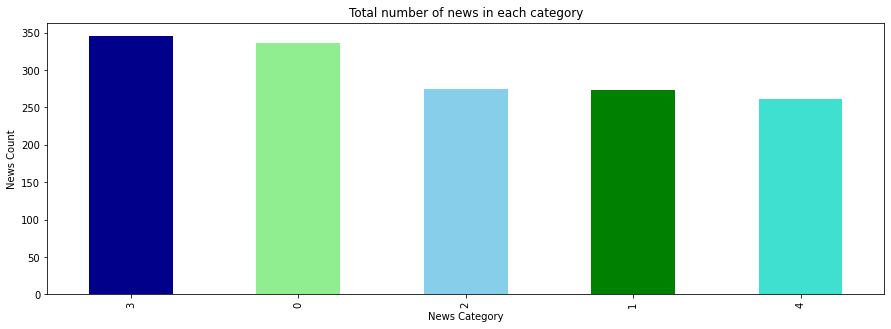

In [10]:
fig = plt.figure(figsize = (15,5))
dataset['Category'].value_counts().plot(kind = "bar", color = ["darkblue", "lightgreen", "skyblue", "green", "turquoise"])
plt.xlabel("News Category")
plt.ylabel("News Count")
plt.title("Total number of news in each category")
plt.show()

Text(0.5, 1.0, 'Overall distribution')

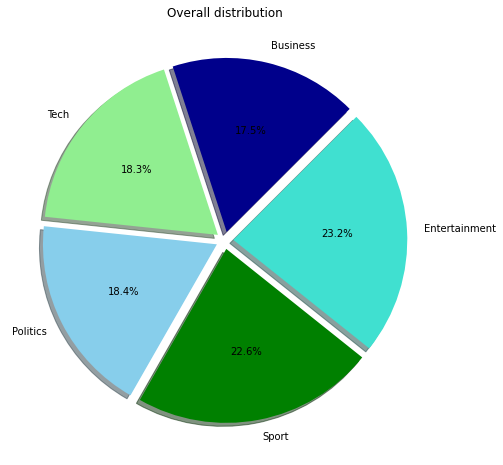

In [11]:
fig = plt.figure(figsize = (50,8))
colors = ["darkblue", "lightgreen", "skyblue", "green", "turquoise"]

business = dataset[dataset['Category'] == 4 ]
tech = dataset[dataset['Category'] == 1 ]
politics = dataset[dataset['Category'] == 2]
sport = dataset[dataset['Category'] == 0]
entertainment = dataset[dataset['Category'] == 3]

count = [business['Category'].count(), tech['Category'].count(), politics['Category'].count(),
         sport['Category'].count(), entertainment['Category'].count()]
pie = plt.pie(count, labels = ['Business', 'Tech', 'Politics', 'Sport', 'Entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))
plt.title("Overall distribution")

## *Generating worldcloud for each news category*

In [12]:
stop = set(stopwords.words('english'))

#function to generate wordcloud
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop,background_color = color,width = 6000, height = 2000).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [13]:
#getting data of each category
business = dataset[dataset['Category'] == 4]
business = business['Text']

tech = dataset[dataset['Category'] == 1]
tech = tech['Text']

politics = dataset[dataset['Category'] == 2]
politics = politics['Text']

sport = dataset[dataset['Category'] == 0]
sport = sport['Text']

entertainment = dataset[dataset['Category'] == 3]
entertainment = entertainment['Text']

Business related words:


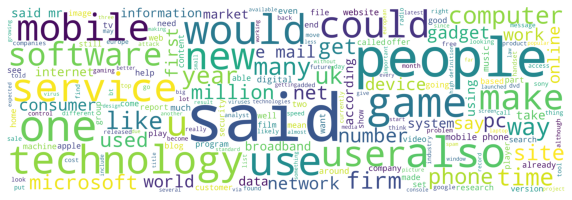

In [14]:
print("Business related words:")
wordcloud_draw(business, 'white')

Tech related words:


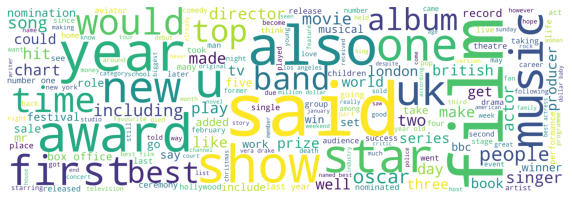

In [15]:
print("Tech related words:")
wordcloud_draw(tech, 'white')

Politics related words:


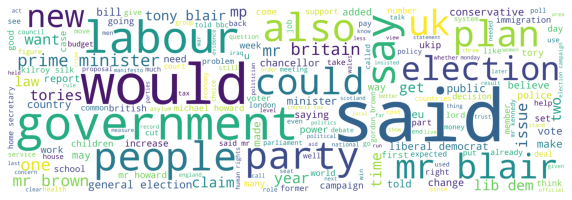

In [16]:
print("Politics related words:")
wordcloud_draw(politics, 'white')

Sport related words:


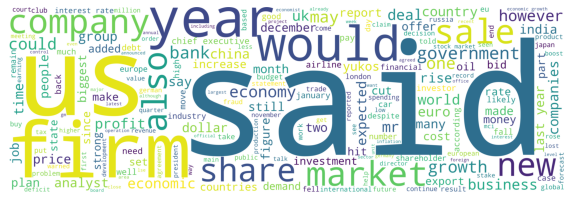

In [17]:
print("Sport related words:")
wordcloud_draw(sport, 'white')

Entertainment related words:


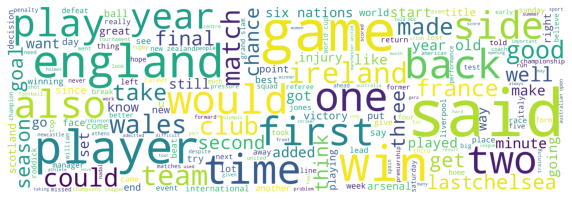

In [18]:
print("Entertainment related words:")
wordcloud_draw(entertainment, 'white')

## *Creating several functions for data transformation using NLP*

In [19]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)


def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

def convert_lower(text):
    return text.lower()

def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])


## *Removing tags from the news using regex*

In [20]:
dataset['Text'] = dataset['Text'].apply(remove_tags)

In [21]:
print(dataset['Text'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


## *Eliminating special character from the news*

In [22]:
dataset['Text'] = dataset['Text'].apply(special_char)

In [23]:
print(dataset['Text'])

0       worldcom ex boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in  168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


## *Converting entire news to lower case*

In [24]:
dataset['Text'] = dataset['Text'].apply(convert_lower)

In [25]:
print(dataset['Text'])

0       worldcom ex boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in  168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


## *Removing stopwords from the news*

In [26]:
dataset['Text'] = dataset['Text'].apply(remove_stopwords)

In [27]:
print(dataset['Text'])

0       [worldcom, ex, boss, launches, defence, lawyer...
1       [german, business, confidence, slides, german,...
2       [bbc, poll, indicates, economic, gloom, citize...
3       [lifestyle, governs, mobile, choice, faster, b...
4       [enron, bosses, 168m, payout, eighteen, former...
                              ...                        
1485    [double, eviction, big, brother, model, capric...
1486    [dj, double, act, revamp, chart, show, dj, duo...
1487    [weak, dollar, hits, reuters, revenues, media,...
1488    [apple, ipod, family, expands, market, apple, ...
1489    [santy, worm, makes, unwelcome, visit, thousan...
Name: Text, Length: 1490, dtype: object


## *Lemmatizing the words present in the news*

In [28]:
dataset['Text'] = dataset['Text'].apply(lemmatize_word)

In [29]:
print(dataset['Text'])

0       worldcom ex bos launch defence lawyer defendin...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss 168m payout eighteen former enron d...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: Text, Length: 1490, dtype: object


## *Dataset after preprocessing*

In [30]:
dataset

,Text,Category
0,worldcom ex bos launch defence lawyer defendin...,0
1,german business confidence slide german busine...,0
2,bbc poll indicates economic gloom citizen majo...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron boss 168m payout eighteen former enron d...,0
...,...,...
1485,double eviction big brother model caprice holb...,1
1486,dj double act revamp chart show dj duo jk joel...,1
1487,weak dollar hit reuters revenue medium group r...,0
1488,apple ipod family expands market apple expande...,4


## *Declaring DV and IDV*

In [31]:
X = dataset['Text']
y = dataset['Category']

## *Vectorizing the data*

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.Text.values)
y = np.array(dataset.Category.values)

cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(X).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## *Fitting the data into various ML models*

In [34]:
#create list of model and accuracy dicts

perform_list = [ ]
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}:  {accuracy}%')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}\n')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),
                              ('Test Accuracy', round(accuracy, 2)),
                              ('Precision', round(precision, 2)),
                              ('Recall', round(recall, 2)),
                              ('F1', round(f1score, 2))]))


In [35]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)
run_model('Random Forest', est_c=None, est_pnlty=None)
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression:  97.15%
Precision : 0.9715447154471545
Recall : 0.9715447154471545
F1-score : 0.9715447154471545

Test Accuracy Score of Basic Random Forest:  98.37%
Precision : 0.983739837398374
Recall : 0.983739837398374
F1-score : 0.983739837398374

Test Accuracy Score of Basic Multinomial Naive Bayes:  98.17%
Precision : 0.9817073170731707
Recall : 0.9817073170731707
F1-score : 0.9817073170731707

Test Accuracy Score of Basic Support Vector Classifer:  95.93%
Precision : 0.959349593495935
Recall : 0.959349593495935
F1-score : 0.959349593495935

Test Accuracy Score of Basic Decision Tree Classifier:  80.69%
Precision : 0.806910569105691
Recall : 0.806910569105691
F1-score : 0.806910569105691

Test Accuracy Score of Basic K Nearest Neighbour:  67.89%
Precision : 0.6788617886178862
Recall : 0.6788617886178862
F1-score : 0.6788617886178862

Test Accuracy Score of Basic Gaussian Naive Bayes:  76.22%
Precision : 0.7621951219512195
Recall : 0.762195121951

## *Model Accuracy*

In [36]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.15,0.97,0.97,0.97
1,Random Forest,98.37,0.98,0.98,0.98
2,Multinomial Naive Bayes,98.17,0.98,0.98,0.98
3,Support Vector Classifer,95.93,0.96,0.96,0.96
4,Decision Tree Classifier,80.69,0.81,0.81,0.81
5,K Nearest Neighbour,67.89,0.68,0.68,0.68
6,Gaussian Naive Bayes,76.22,0.76,0.76,0.76


## *Selecting best model*

In [37]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 98.37 from Random


## *Training the model*

In [38]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)

In [39]:
score = classifier.score(x_test, y_test)
print(score)

0.9613821138211383


## *Predicting the output with test data*

#### *1) Loading test data*

In [40]:
id_sheet = "1jE3rlC4D_1yfeuhS9ihatXpdnI4m2y3BLbkrLQvc8j4"
excel = pd.ExcelFile(
        f"https://docs.google.com/spreadsheets/d/{id_sheet}/export?format=xlsx")
test = pd.read_excel(excel, "Sheet1", header=0)

#### *2) Preprocessing test data*

In [41]:
test['Text'] = test['Text'].apply(remove_tags)
test['Text'] = test['Text'].apply(special_char)
test['Text'] = test['Text'].apply(convert_lower)
test['Text'] = test['Text'].apply(remove_stopwords)
test['Text'] = test['Text'].apply(lemmatize_word)

X = pd.DataFrame(test['Text'])
x = np.array(X.iloc[:, 0].values)

cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(X.Text).toarray()

#### *3) Predicting the output*

In [42]:
result=classifier.predict(x)
result

array([3, 3, 3, ..., 3, 1, 3])

In [43]:
test['Category']=result

In [44]:
test

,ArticleId,Text,Category
0,1018.0,qpr keeper day head preston queen park ranger ...,3
1,1319.0,software watching work software monitor every ...,3
2,1138.0,arcy injury add ireland woe gordon arcy ruled ...,3
3,459.0,india reliance family feud heat ongoing public...,3
4,1020.0,boro suffer morrison injury blow middlesbrough...,3
...,...,...,...
1485,857.0,double eviction big brother model caprice holb...,3
1486,325.0,dj double act revamp chart show dj duo jk joel...,3
1487,1590.0,weak dollar hit reuters revenue medium group r...,3
1488,1587.0,apple ipod family expands market apple expande...,1


## *Saving the Model*

In [45]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))